### Stock Analysis

In [2]:
# Requirements 
!pip install yfinance

zsh:1: /Users/eunahjung/Documents/PythonProject/.venv/bin/pip: bad interpreter: /Users/eunahjung/Documents/PythonProject/stock_analysis/.venv/bin/python: no such file or directory


In [3]:
!python -m pip install statsmodels 

In [4]:
import yfinance as yf
from datetime import date

ticker = 'ADYEN.AS'

start_date = '2023-08-01'
end_date = date.today()

data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
close = yf.download(ticker, start=start_date, end=end_date, interval="1d")["Close"]

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_47467/2103475047.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed
/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_47467/2103475047.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close = yf.download(ticker, start=start_date, end=end_date, interval="1d")["Close"]
[*********************100%***********************]  1 of 1 completed


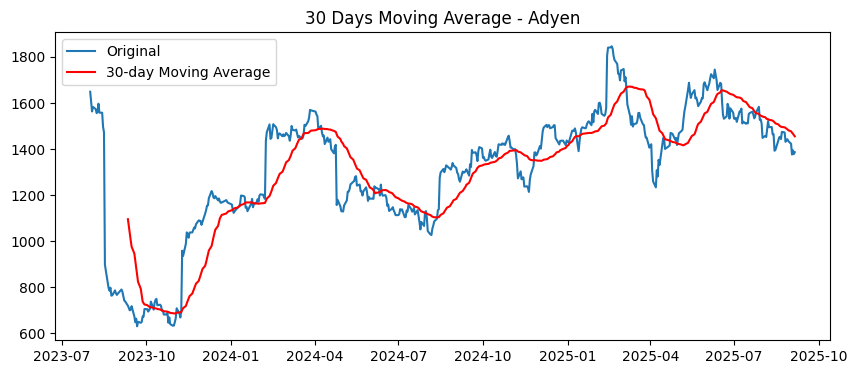

In [5]:
import matplotlib.pyplot as plt

# Moving Average (30 day window)
close_ma30 = close.rolling(window=30).mean()

plt.figure(figsize=(10,4))
plt.title("30 Days Moving Average - Adyen")
plt.plot(close, label="Original")
plt.plot(close_ma30, label="30-day Moving Average", color="red")
plt.legend(); plt.show()

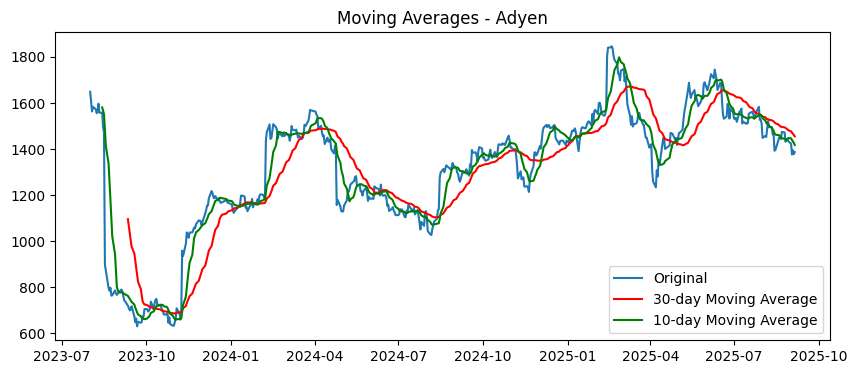

In [6]:
# 2. Closing Price data
close = data['Close']

# 3. Moving Average Calculations
close_ma30 = close.rolling(window=30).mean()
close_ma10 = close.rolling(window=10).mean()

# 4. Visualization
plt.figure(figsize=(10,4))
plt.title("Moving Averages - Adyen")
plt.plot(close, label="Original")
plt.plot(close_ma30, label="30-day Moving Average", color="red")
plt.plot(close_ma10, label="10-day Moving Average", color="green")
plt.legend()
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 537 entries, 2023-08-01 to 2025-09-05
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, ADYEN.AS)   537 non-null    float64
 1   (High, ADYEN.AS)    537 non-null    float64
 2   (Low, ADYEN.AS)     537 non-null    float64
 3   (Open, ADYEN.AS)    537 non-null    float64
 4   (Volume, ADYEN.AS)  537 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 25.2 KB


/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_47467/1811032282.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = close.resample("M").mean()


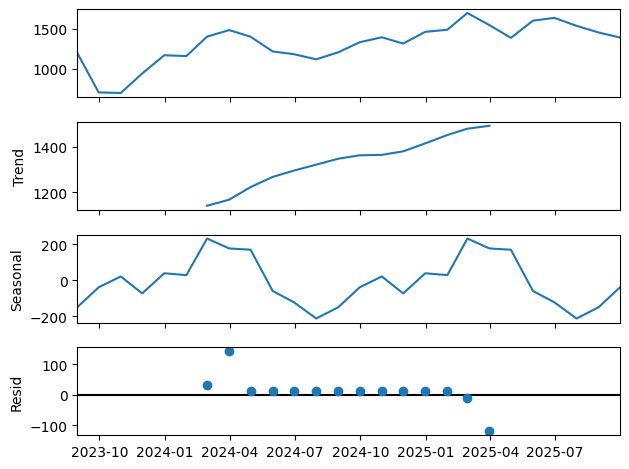

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Monthly Average
monthly = close.resample("M").mean()  
result = seasonal_decompose(monthly, model="additive", period=12)
result.plot(); plt.show()


In [9]:
import pandas as pd
tmp_series = data['Close']

series = tmp_series.reset_index(drop=True)
series

Ticker,ADYEN.AS
0,1648.599976
1,1608.000000
2,1563.199951
3,1582.800049
4,1573.400024
...,...
532,1423.000000
533,1376.199951
534,1394.400024
535,1377.800049


In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(1,1,1)
model1 = ARIMA(series, order=(1,1,1)).fit()
print("ARIMA(1,1,1) Prediction:", model1.forecast(steps=2))

# ARIMA(2,1,0)
model2 = ARIMA(series, order=(2,1,0)).fit()
print("ARIMA(2,1,0) Prediction:", model2.forecast(steps=2))

# ARIMA(0,1,2)
model3 = ARIMA(series, order=(0,1,2)).fit()
print("ARIMA(0,1,2) Prediction:", model3.forecast(steps=2))


ARIMA(1,1,1) Prediction: 537    1385.658452
538    1385.126545
Name: predicted_mean, dtype: float64
ARIMA(2,1,0) Prediction: 537    1384.866200
538    1385.799466
Name: predicted_mean, dtype: float64
ARIMA(0,1,2) Prediction: 537    1385.322654
538    1386.077248
Name: predicted_mean, dtype: float64


In [13]:
# Train-test split (same as ARIMA, e.g., last 100 days for test)
train = data[:-100]
test = data[-100:]
features = ['High', 'Low', 'Open']
X_train = train[features]
y_train = train['Close']
X_test = test[features]
y_test = test['Close']

In [39]:
!python3 -m pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 281.6 kB/s  0:00:41m0:00:0100:02
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [41]:
!python3 -m pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 821.8 kB/s  0:00:02 eta 0:00:01


In [50]:
!pip install xgboost --no-cache-dir

zsh:1: /Users/eunahjung/Documents/PythonProject/.venv/bin/pip: bad interpreter: /Users/eunahjung/Documents/PythonProject/stock_analysis/.venv/bin/python: no such file or directory


In [52]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Confirm this

In [53]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
!brew install libomp

1901.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


==> Auto-updating Homebrew...
Adjust how often this is run with `$HOMEBREW_AUTO_UPDATE_SECS` or disable with
`$HOMEBREW_NO_AUTO_UPDATE=1`. Hide these hints with `$HOMEBREW_NO_ENV_HINTS=1` (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
addlicense: Scan directories recursively to ensure source files have license headers
anchor: Solana Program Framework
bom: Utility to generate SPDX-compliant Bill of Materials manifests
gphotos-uploader-cli: Command-line tool to mass upload media folders to Google Photos
lazycontainer: Terminal UI for Apple Containers
moribito: TUI for LDAP Viewing/Queries
nanoarrow: Helpers for Arrow C Data & Arrow C Stream interfaces
nextflow: Reproducible scientific workflows
plutobook: Paged HTML Rendering Library
plutoprint: Generate PDFs and Images from HTML
seqan3: Modern C++ library for sequence analysis
specify: Toolkit to help you get started with Spec-Driven Development
tiny-remapper: Tiny, effici

In [75]:
!pip3 install xgboost

1947.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


zsh:1: /Users/eunahjung/Documents/PythonProject/.venv/bin/pip3: bad interpreter: /Users/eunahjung/Documents/PythonProject/stock_analysis/.venv/bin/python: no such file or directory


In [76]:
from xgboost import XGBRegressor
# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)

# Error metrics (now works with import)
mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
print(f'XGBoost - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}')

XGBoost - MAE: 15.55, RMSE: 22.73


ARIMA - MAE: 155.84, RMSE: 181.31


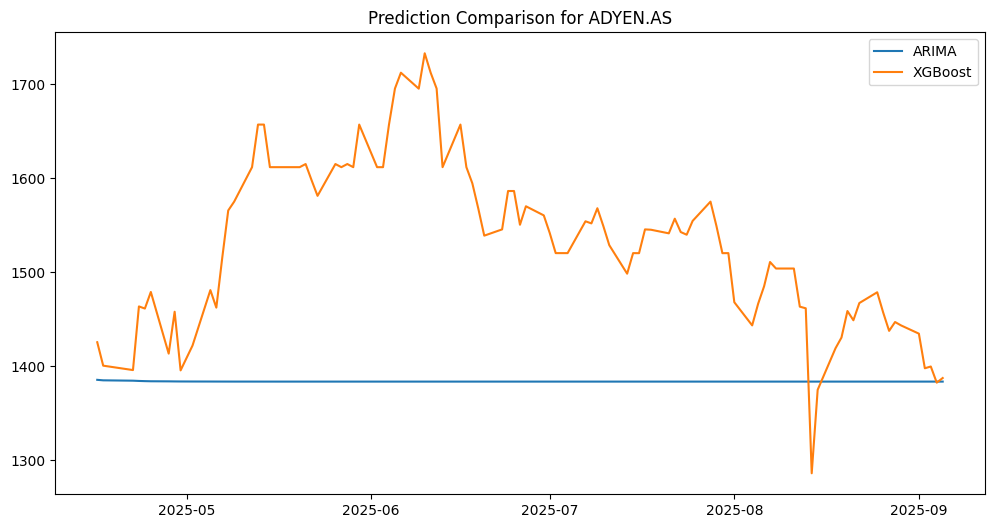

     Model         MAE        RMSE
0    ARIMA  155.843412  181.309697
1  XGBoost   15.545938   22.728735


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

arima_model = ARIMA(series, order=(1,1,1)).fit()
pred_arima = arima_model.forecast(steps=len(test))
mae_arima = mean_absolute_error(y_test, pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, pred_arima))
print(f'ARIMA - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}')

# Plot all predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test.index, pred_arima, label='ARIMA')
plt.plot(test.index, pred_xgb, label='XGBoost')
plt.title(f'Prediction Comparison for {ticker}')
plt.legend()
plt.show()

# Summary table
metrics = pd.DataFrame({
    'Model': ['ARIMA', 'XGBoost'],
    'MAE': [mae_arima, mae_xgb],
    'RMSE': [rmse_arima, rmse_xgb]
})
print(metrics)